In [225]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = load_diabetes()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [226]:
df_X=data.data
df_y=data.target

print("data : ",df_X)
print("target : ",df_y)

data :  [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
target :  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150

<Axes: >

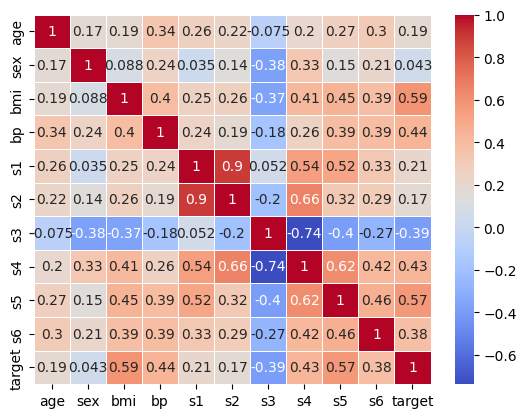

In [227]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [228]:
# np.s_[5:9]
df_X = np.delete(df_X,[4,7,9], axis=1)
df_X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.03482076,
       -0.04340085,  0.01990749])

In [229]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.25,random_state=42)

print("X_train 개수:", len(X_train))
print("X_test 개수:", len(X_test))
print("y_train 개수:", len(y_train))
print("y_test 개수:", len(y_test))

X_train 개수: 331
X_test 개수: 111
y_train 개수: 331
y_test 개수: 111


In [230]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [231]:
###data 속성 갯수 10개
W = np.random.rand(len(df_X[0]))
b= np.random.rand()

print(W,b)

[0.61435427 0.67499838 0.00968128 0.44619158 0.43260627 0.5101538
 0.46042445] 0.05124177223609572


In [232]:
def model(X, W, b):
    predictions = 0
    for i in range(len(X[0])):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [233]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [234]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [235]:
def gradient(X,W,b,y):
    N = len(y)
    y_pred = model(X,W,b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [236]:
LEARNING_RATE=0.1

In [237]:
len(X_train[0])

7

In [238]:
losses=[]

for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6255.5979
Iteration 20 : Loss 5928.9801
Iteration 30 : Loss 5871.6806
Iteration 40 : Loss 5818.5703
Iteration 50 : Loss 5766.5695
Iteration 60 : Loss 5715.6202
Iteration 70 : Loss 5665.6997
Iteration 80 : Loss 5616.7861
Iteration 90 : Loss 5568.8582
Iteration 100 : Loss 5521.8949
Iteration 110 : Loss 5475.8759
Iteration 120 : Loss 5430.7812
Iteration 130 : Loss 5386.5911
Iteration 140 : Loss 5343.2866
Iteration 150 : Loss 5300.8490
Iteration 160 : Loss 5259.2598
Iteration 170 : Loss 5218.5012
Iteration 180 : Loss 5178.5557
Iteration 190 : Loss 5139.4060
Iteration 200 : Loss 5101.0355
Iteration 210 : Loss 5063.4276
Iteration 220 : Loss 5026.5662
Iteration 230 : Loss 4990.4358
Iteration 240 : Loss 4955.0208
Iteration 250 : Loss 4920.3062
Iteration 260 : Loss 4886.2773
Iteration 270 : Loss 4852.9198
Iteration 280 : Loss 4820.2193
Iteration 290 : Loss 4788.1623
Iteration 300 : Loss 4756.7352
Iteration 310 : Loss 4725.9247
Iteration 320 : Loss 4695.7180
Iteration 330 : L

Iteration 880 : Loss 3670.4325
Iteration 890 : Loss 3660.1204
Iteration 900 : Loss 3649.9900
Iteration 910 : Loss 3640.0376
Iteration 920 : Loss 3630.2598
Iteration 930 : Loss 3620.6531
Iteration 940 : Loss 3611.2140
Iteration 950 : Loss 3601.9393
Iteration 960 : Loss 3592.8257
Iteration 970 : Loss 3583.8700
Iteration 980 : Loss 3575.0691
Iteration 990 : Loss 3566.4199
Iteration 1000 : Loss 3557.9195
Iteration 1010 : Loss 3549.5649
Iteration 1020 : Loss 3541.3533
Iteration 1030 : Loss 3533.2818
Iteration 1040 : Loss 3525.3478
Iteration 1050 : Loss 3517.5485
Iteration 1060 : Loss 3509.8813
Iteration 1070 : Loss 3502.3436
Iteration 1080 : Loss 3494.9329
Iteration 1090 : Loss 3487.6467
Iteration 1100 : Loss 3480.4827
Iteration 1110 : Loss 3473.4384
Iteration 1120 : Loss 3466.5115
Iteration 1130 : Loss 3459.6997
Iteration 1140 : Loss 3453.0009
Iteration 1150 : Loss 3446.4129
Iteration 1160 : Loss 3439.9335
Iteration 1170 : Loss 3433.5606
Iteration 1180 : Loss 3427.2922
Iteration 1190 : Los

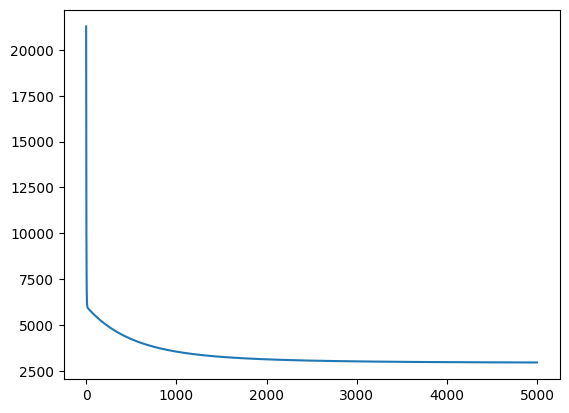

In [239]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [240]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2791.866131364904)

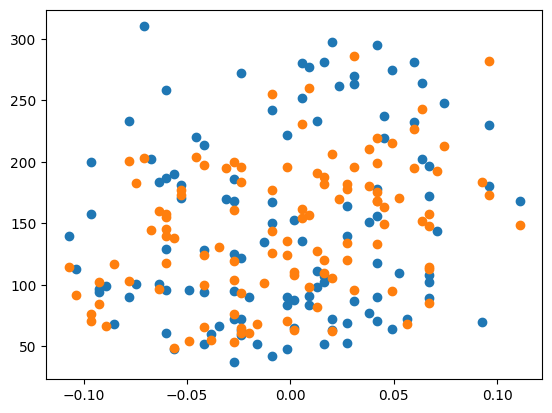

In [243]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()